# Exploratory Data Analysis

## Automobile Dataset

### Problem Statement :

This dataset consist of data From 1985 Ward's Automotive Yearbook. It consists of three types of entities:
- The specification of an auto in terms of various characteristics
- Its assigned insurance risk rating 
- Its normalized losses in use as compared to other cars.



### About the DataSet :

Below are the features in the dataset and their description

|Features|Description|
|-----|-----|
|symboling|It is a risk factor symbol associated to the price & corresponds to the degree to which an automobile is more risky than its price indicates. +3 indicates risky, -3 indicates safety|
|make|Indicates the maker or manufacturer of the automobile|
|fuel-type|Indicates the type of fuel - diesel or gas|
|body-style|Indicates whether the body shape of automobile is a hardtop, wagon, sedan, hatchback or convertible|
|drive-wheels|Indicates the configuration of drive wheels for the automobile|
|wheel-base|It is the distance between the centers of the front wheel and the rear wheel. It is continuous ranging from 86.6 120.9|
|length|Indicates length of the automobile and ranges from 141.1 to 208.1.|
|width|Indicates width of the automobile and ranges from 60.3 to 72.3|
|height|Indicates the width of the automobile and ranges 47.8 to 59.8|
|horsepower|Maximum horsepower the automobile engine can output and ranges from 48 to 288|
|peak-rpm|RPM is a way to measure how many times per minute components in the engine rotate. It ranges from 4150 to 6600|
|highway-mpg|Indicates the miles per galon typically consumed at highways. It is continuous from 4150 to 6600|
|city-mpg|Indicates the miles per galon typically consumed at cities. It is continuous from 13 to 49|
|price|Indicates the price of the automobile and ranges from 5118 to 45400|
|normalized-losses|It is a continuous variable ranging from 65 to 256|
|engine-location|Indicates the location of the engine - front or rear|
|engine-type|Indicates the type of engine.|
|engine-size|It is continuous from 61 to 326|

### Load and understand your data
- The data consists of 205 instances and 14 features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelEncoder
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/Automobile_data1.csv')
df.head()

symboling         make fuel-type   body-style drive-wheels  wheel-base  \
0          3  alfa-romero       gas  convertible          rwd        88.6   
1          3  alfa-romero       gas  convertible          rwd        88.6   
2          1  alfa-romero       gas    hatchback          rwd        94.5   
3          2         audi       gas        sedan          fwd        99.8   
4          2         audi       gas        sedan          4wd        99.4   

   length  width  height  horsepower  peak-rpm  highway-mpg  city-mpg  price  
0   168.8   64.1    48.8         111      5000           27        21  13495  
1   168.8   64.1    48.8         111      5000           27        21  16500  
2   171.2   65.5    52.4         154      5000           26        19  16500  
3   176.6   66.2    54.3         102      5500           30        24  13950  
4   176.6   66.4    54.3         115      5500           22        18  17450

### Check the number of null values in each column get a general description of your data

In [3]:
df.shape

(205, 14)

In [4]:
df.dtypes

symboling         int64
make             object
fuel-type        object
body-style       object
drive-wheels     object
wheel-base      float64
length          float64
width           float64
height          float64
horsepower        int64
peak-rpm          int64
highway-mpg       int64
city-mpg          int64
price             int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
symboling       205 non-null int64
make            205 non-null object
fuel-type       205 non-null object
body-style      205 non-null object
drive-wheels    205 non-null object
wheel-base      205 non-null float64
length          205 non-null float64
width           205 non-null float64
height          205 non-null float64
horsepower      205 non-null int64
peak-rpm        205 non-null int64
highway-mpg     205 non-null int64
city-mpg        205 non-null int64
price           205 non-null int64
dtypes: float64(4), int64(6), object(4)
memory usage: 22.5+ KB


In [6]:
df.isnull().sum()

symboling       0
make            0
fuel-type       0
body-style      0
drive-wheels    0
wheel-base      0
length          0
width           0
height          0
horsepower      0
peak-rpm        0
highway-mpg     0
city-mpg        0
price           0
dtype: int64

In [7]:
df.notnull().sum()

symboling       205
make            205
fuel-type       205
body-style      205
drive-wheels    205
wheel-base      205
length          205
width           205
height          205
horsepower      205
peak-rpm        205
highway-mpg     205
city-mpg        205
price           205
dtype: int64

In [8]:
df.describe()

symboling  wheel-base      length       width      height  horsepower  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878  104.936585   
std      1.245307    6.021776   12.337289    2.145204    2.443522   40.609702   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   48.000000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   70.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   95.000000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000  116.000000   
max      3.000000  120.900000  208.100000   72.300000   59.800000  288.000000   

          peak-rpm  highway-mpg    city-mpg         price  
count   205.000000   205.000000  205.000000    205.000000  
mean   5127.804878    30.751220   25.219512  13476.258537  
std     478.414007     6.886443    6.542142   8114.166248  
min    4150.000000    16.000000   13.000000   5118.000000  
25%    4800.000000    25.000000   19.000000   7788.000000  
50%    5200.000000    30.000000   24.000000  10595.000000  
75%    5500.000000    34.000000   30.000000  16558.000000  
max    6600.000000    54.000000   49.000000  45400.000000

### Plot a histogram showing the distribution of the car prices (target variable) and if any skewness, print the value of skewness

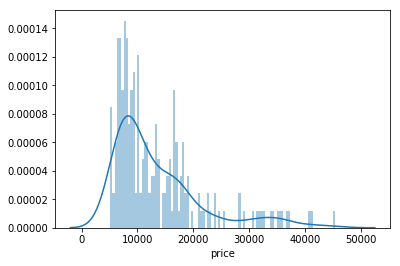

In [13]:
sns.distplot(df['price'], bins=100, kde=True)

In [14]:
skew(df['price'])

1.671975747887442

In [15]:
df.price.skew()

1.684325214046249

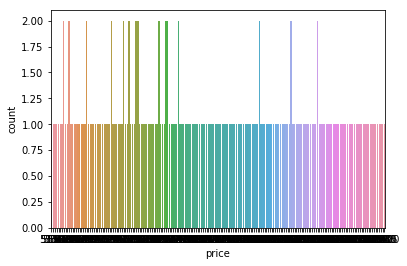

In [19]:
sns.countplot(x='price', data=df)

### Plot a countplot of the 'make' column of the dataset which represents the different car makers.

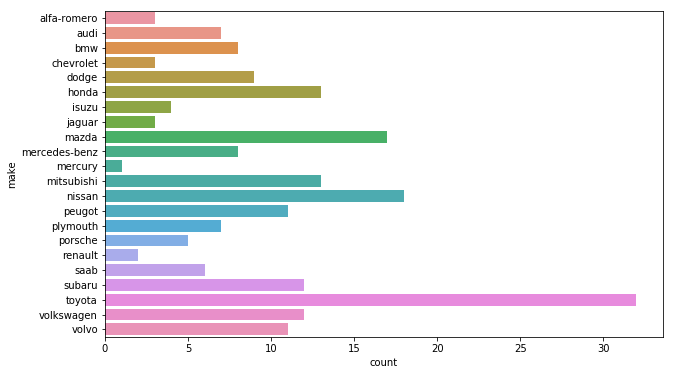

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y='make', data=df)

### Plot a jointplot that shows the relationship between the 'horsepower' and 'price' of the car.

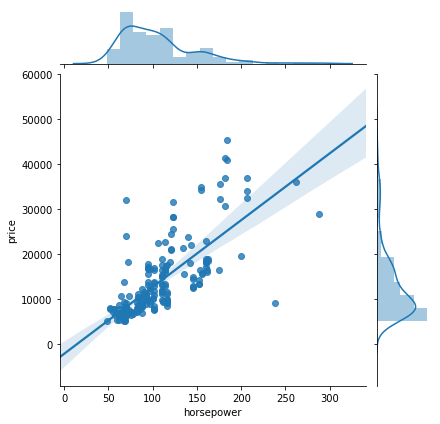

In [25]:
sns.jointplot(x='horsepower', y='price', data=df, kind='reg')

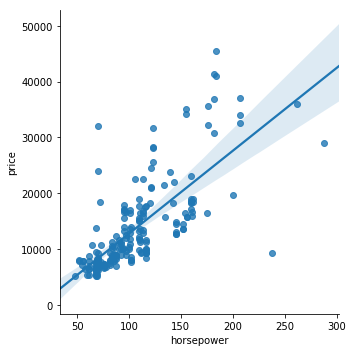

In [26]:
sns.lmplot(x='horsepower', y='price', data=df)

### Plot the insurance risk ratings for all the automobiles

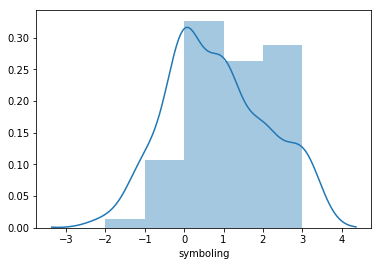

In [28]:
sns.distplot(df['symboling'], bins=5)

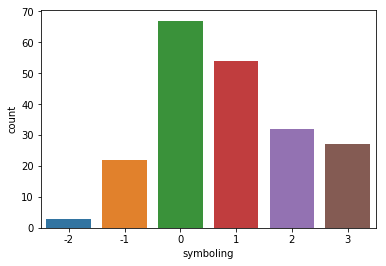

In [30]:
sns.countplot(df['symboling'])

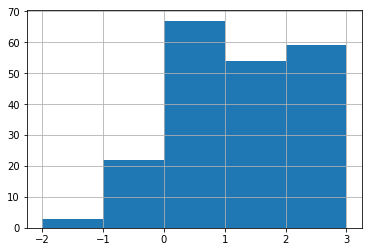

In [32]:
df['symboling'].hist(bins=5)

### Plot a pie chart of the fuel-type of the automobiles

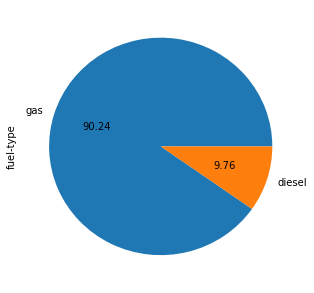

In [36]:
plt.figure(figsize=(5,5))
df['fuel-type'].value_counts().plot.pie(autopct='%.2f')

### Plot the pearson correlation of all the features in a heatmap.

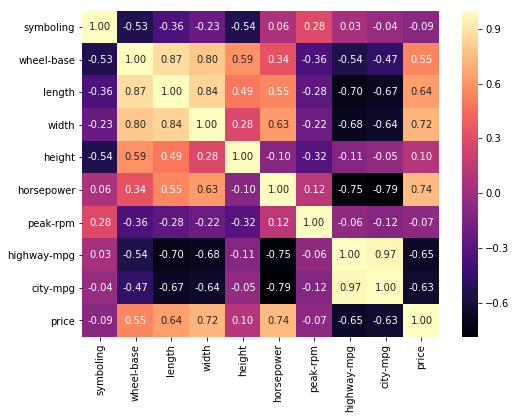

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='magma')

### Plot a boxplot that shows the variability of each 'body-style' with respect to the 'price'.

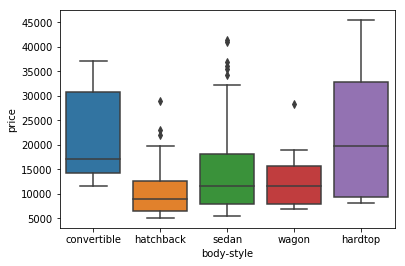

In [50]:
sns.boxplot(x='body-style', y='price', data=df)

### Plot a boxplot showing the variablity in the 'price' for each 'make' of the car 

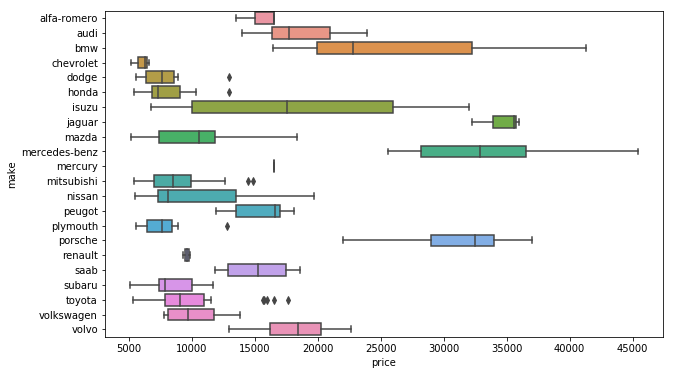

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(y='make', x='price', data=df)

## Data Preprocessing for the Automobile dataset

In [92]:
automobile = pd.read_csv('../data/Automobile_data.csv')
automobile.head()
#y = automobile[["price"]]
#automobile.drop("price",1,inplace=True)

symboling normalized-losses         make fuel-type   body-style  \
0          3                 ?  alfa-romero       gas  convertible   
1          3                 ?  alfa-romero       gas  convertible   
2          1                 ?  alfa-romero       gas    hatchback   
3          2               164         audi       gas        sedan   
4          2               164         audi       gas        sedan   

  drive-wheels engine-location  width  height engine-type  engine-size  \
0          rwd           front   64.1    48.8        dohc          130   
1          rwd           front   64.1    48.8        dohc          130   
2          rwd           front   65.5    52.4        ohcv          152   
3          fwd           front   66.2    54.3         ohc          109   
4          4wd           front   66.4    54.3         ohc          136   

  horsepower  city-mpg  highway-mpg  price  
0        111        21           27  13495  
1        111        21           27  16500  
2        154        19           26  16500  
3        102        24           30  13950  
4        115        18           22  17450

### Find out number of records having '?' value for normalized losses

In [61]:
# Number of records having '?' value
automobile['normalized-losses'].loc[automobile['normalized-losses'] == '?'].count()
# automobile[automobile['normalized-losses']=='?']['normalized-losses'].count()

41

### Impute the missing values of the numerical data with mean of the column (`normalized-losses and horsepower`)  (Make sure you replace "?" by "NaN" for entire dataset before Imputing).

In [93]:
#automobile = automobile.replace('?', 'NaN')
automobile.replace('?', 'NaN', inplace=True)

In [76]:
automobile.head()

symboling normalized-losses         make fuel-type   body-style  \
0          3               NaN  alfa-romero       gas  convertible   
1          3               NaN  alfa-romero       gas  convertible   
2          1               NaN  alfa-romero       gas    hatchback   
3          2               164         audi       gas        sedan   
4          2               164         audi       gas        sedan   

  drive-wheels engine-location  width  height engine-type  engine-size  \
0          rwd           front   64.1    48.8        dohc          130   
1          rwd           front   64.1    48.8        dohc          130   
2          rwd           front   65.5    52.4        ohcv          152   
3          fwd           front   66.2    54.3         ohc          109   
4          4wd           front   66.4    54.3         ohc          136   

  horsepower  city-mpg  highway-mpg  price  
0        111        21           27  13495  
1        111        21           27  16500  
2        154        19           26  16500  
3        102        24           30  13950  
4        115        18           22  17450

In [94]:
imp = Imputer(missing_values=np.nan, strategy='mean')

In [68]:
# automobile['normalized-losses'] = imp.fit_transform(np.array(automobile['normalized-losses']).reshape(-1, 1))
# automobile['horsepower'] = imp.fit_transform(np.array(automobile['horsepower']).reshape(-1, 1))

In [79]:
type(automobile['normalized-losses'])

pandas.core.series.Series

In [81]:
type(automobile[['normalized-losses']])

pandas.core.frame.DataFrame

In [95]:
automobile['normalized-losses'] = imp.fit_transform(automobile[['normalized-losses']])
automobile['horsepower'] = imp.fit_transform(automobile[['horsepower']])

In [84]:
automobile.head()

symboling  normalized-losses         make fuel-type   body-style  \
0          3              122.0  alfa-romero       gas  convertible   
1          3              122.0  alfa-romero       gas  convertible   
2          1              122.0  alfa-romero       gas    hatchback   
3          2              164.0         audi       gas        sedan   
4          2              164.0         audi       gas        sedan   

  drive-wheels engine-location  width  height engine-type  engine-size  \
0          rwd           front   64.1    48.8        dohc          130   
1          rwd           front   64.1    48.8        dohc          130   
2          rwd           front   65.5    52.4        ohcv          152   
3          fwd           front   66.2    54.3         ohc          109   
4          4wd           front   66.4    54.3         ohc          136   

   horsepower  city-mpg  highway-mpg  price  
0       111.0        21           27  13495  
1       111.0        21           27  16500  
2       154.0        19           26  16500  
3       102.0        24           30  13950  
4       115.0        18           22  17450


### Check the skewness of the numeric features and apply square root transformation on features with skewness greater than 1.

In [96]:
numeric_feature_auto = automobile._get_numeric_data().columns
numeric_feature_auto

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [97]:
for feature in numeric_feature_auto:
    print('Feature: {}, Skewness: {:.2f}'.format(feature, skew(automobile[feature])))

Feature: symboling, Skewness: 0.21
Feature: normalized-losses, Skewness: 0.85
Feature: width, Skewness: 0.90
Feature: height, Skewness: 0.06
Feature: engine-size, Skewness: 1.93
Feature: horsepower, Skewness: 1.39
Feature: city-mpg, Skewness: 0.66
Feature: highway-mpg, Skewness: 0.54
Feature: price, Skewness: 1.79


In [90]:
for feature in numeric_feature_auto:
    if skew(automobile[feature]) > 1:
        automobile[feature] = np.sqrt(automobile[feature])

In [91]:
for feature in numeric_feature_auto:
    print('Feature: {}, Skewness: {:.2f}'.format(feature, skew(automobile[feature])))

Feature: symboling, Skewness: 0.21
Feature: normalized-losses, Skewness: 0.85
Feature: width, Skewness: 0.90
Feature: height, Skewness: 0.06
Feature: engine-size, Skewness: 1.35
Feature: horsepower, Skewness: 0.88
Feature: city-mpg, Skewness: 0.66
Feature: highway-mpg, Skewness: 0.54
Feature: price, Skewness: 1.21


In [98]:
for feature in numeric_feature_auto:
    if skew(automobile[feature]) > 1:
        automobile[feature] = np.log(automobile[feature])

In [99]:
for feature in numeric_feature_auto:
    print('Feature: {}, Skewness: {:.2f}'.format(feature, skew(automobile[feature])))

Feature: symboling, Skewness: 0.21
Feature: normalized-losses, Skewness: 0.85
Feature: width, Skewness: 0.90
Feature: height, Skewness: 0.06
Feature: engine-size, Skewness: 0.85
Feature: horsepower, Skewness: 0.47
Feature: city-mpg, Skewness: 0.66
Feature: highway-mpg, Skewness: 0.54
Feature: price, Skewness: 0.66


### Scaling using MAxMin and StandardScaler for engine-size column

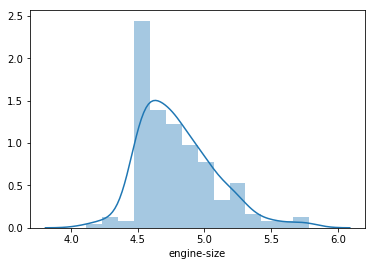

In [100]:
sns.distplot(automobile['engine-size'])

In [101]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [103]:
automobile['engine-size-std'] = scaler.fit_transform(automobile[['engine-size']])

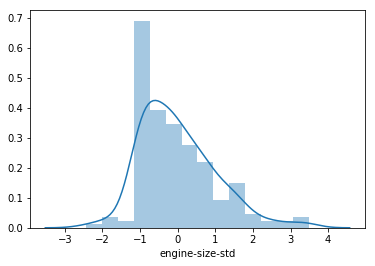

In [104]:
sns.distplot(automobile['engine-size-std'])

In [105]:
minmaxscaler = MinMaxScaler()
automobile['engine-size-minmax'] = minmaxscaler.fit_transform(automobile[['engine-size']])

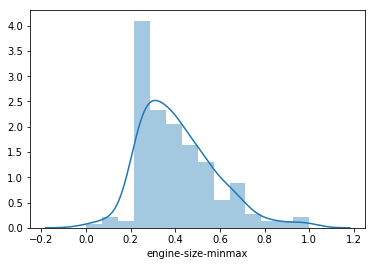

In [106]:
sns.distplot(automobile['engine-size-minmax'])

### Combine the 'height' and 'width' to make a new feature 'area' of the frame of the car.

In [107]:
automobile['area'] = automobile['height'] * automobile['width']


###  Label Encode the categorical features.


In [109]:
#one-hot encoding
df1 = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': ['b', 'b', 'c'], 'C': [1, 2, 3]})
df1

A  B  C
0  a  b  1
1  b  b  2
2  c  c  3

In [110]:
df2 = pd.get_dummies(df1)
df2

C  A_a  A_b  A_c  B_b  B_c
0  1    1    0    0    1    0
1  2    0    1    0    1    0
2  3    0    0    1    0    1

In [111]:
#Label Encoding

featsToEncode = list(automobile.select_dtypes(include = 'object'))
featsToEncode

['make',
 'fuel-type',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type']

In [112]:
def featEncoder(automobile):
    le = LabelEncoder()
    for feat in featsToEncode:
        try:
            automobile[feat] = le.fit_transform(automobile[feat])
        except:
            print('Error Encoding ', feat)
    return automobile

In [113]:
automobile = featEncoder(automobile)

In [114]:
automobile.head()

symboling  normalized-losses  make  fuel-type  body-style  drive-wheels  \
0          3              122.0     0          1           0             2   
1          3              122.0     0          1           0             2   
2          1              122.0     0          1           2             2   
3          2              164.0     1          1           3             1   
4          2              164.0     1          1           3             0   

   engine-location  width  height  engine-type  engine-size  horsepower  \
0                0   64.1    48.8            0     4.867534    4.709530   
1                0   64.1    48.8            0     4.867534    4.709530   
2                0   65.5    52.4            5     5.023881    5.036953   
3                0   66.2    54.3            3     4.691348    4.624973   
4                0   66.4    54.3            3     4.912655    4.744932   

   city-mpg  highway-mpg     price  engine-size-std  engine-size-minmax  \
0        21           27  9.510075         0.238597            0.451462   
1        21           27  9.711116         0.238597            0.451462   
2        19           26  9.711116         0.792476            0.544746   
3        24           30  9.543235        -0.385569            0.346340   
4        18           22  9.767095         0.398443            0.478383   

      area  
0  3128.08  
1  3128.08  
2  3432.20  
3  3594.66  
4  3605.52

### Split the Independent features and target(`price`) variable into X and y. 

In [118]:
X  = automobile.drop('price',1)
y = automobile['price']

### Split X and y into training and validation data and apply the Linear regression Model

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)

### Print the different evaluation metrics like Mean Squared error, R2 Score, Mean Absolute Error and RMSE

In [121]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Squared Error: ",mean_squared_error(y_pred, y_val))
print("R2 Score: ",r2_score(y_pred, y_val))
print("Mean Absolute Error: ",mean_absolute_error(y_pred, y_val))
print("RMSE: ",np.sqrt(mean_squared_error(y_pred, y_val)))

Mean Squared Error:  0.0798403705863
R2 Score:  0.733486810868
Mean Absolute Error:  0.169490654894
RMSE:  0.282560383965


# Thank You
***
### Next Session: Logistic Regression
For more queries - Reach out to academics@greyatom.com 